# Seungki Hong 

{
    // string, 22 character unique string business id
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // string, the business's name
    "name": "Garaje",

    // string, the neighborhood's name
    "neighborhood": "SoMa",

    // string, the full address of the business
    "address": "475 3rd St",

    // string, the city
    "city": "San Francisco",

    // string, 2 character state code, if applicable
    "state": "CA",

    // string, the postal code
    "postal code": "94107",

    // float, latitude
    "latitude": 37.7817529521,

    // float, longitude
    "longitude": -122.39612197,

    // float, star rating, rounded to half-stars
    "stars": 4.5,

    // interger, number of reviews
    "review_count": 1198,

    // integer, 0 or 1 for closed or open, respectively
    "is_open": 1,

    // object, business attributes to values. note: some attribute values might be objects
    "attributes": {
        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },
    },

    // an array of strings of business categories
    "categories": [
        "Mexican",
        "Burgers",
        "Gastropubs"
    ],

    // an object of key day to value hours, hours are using a 24hr clock
    "hours": {
        "Monday": "10:00-21:00",
        "Tuesday": "10:00-21:00",
        "Friday": "10:00-21:00",
        "Wednesday": "10:00-21:00",
        "Thursday": "10:00-21:00",
        "Sunday": "11:00-18:00",
        "Saturday": "10:00-21:00"
    }
}

In [3]:
from utils.preprocess import JSONLoader
                        
business = 'business.json'
review = 'review.json'
user = 'user.json'
data_dir = 'data/dataset'

'''
restaurant_list=['Restaurants', 'Food', 'Sandwiches', 'Fast Food', 'American (Traditional)', 'Pizza',
                 'Italian', 'Burgers', 'Mexican','Breakfast & Brunch', 'American (New)', 'Chinese', 'Specialty Food', 'Bakeries', 'Desserts',
                 'Japanese', 'Ice Cream & Frozen Yogurt', 'Chicken Wings, Seafood', 'Salad', 'Sushi Bars',
                 'Asian Fusion', 'Thai', 'Indian']
'''

f_b, json_b = JSONLoader(business, data_dir, fields = ['business_id', 'city', 'categories', 'is_open', 'latitude', 'longitude', 'stars', 'review_count']).sample(156639)

In [9]:
f_b

['business_id',
 'city',
 'categories',
 'is_open',
 'latitude',
 'longitude',
 'stars',
 'review_count']

In [15]:
# Just for information

city_name = 'Toronto'
city_count = 0
for entry in json_b:
    if entry[1] == city_name:
        city_count = city_count + 1

print (city_name, str(city_count))

Toronto 15483


In [76]:
# Toronto
# Restaurant
# business id, star, review_count

restaurant_list=['Restaurants', 'Food', 'Sandwiches', 'Fast Food', 'American (Traditional)', 'Pizza',
                 'Italian', 'Burgers', 'Mexican','Breakfast & Brunch', 'American (New)', 'Chinese', 'Specialty Food', 'Bakeries', 'Desserts',
                 'Japanese', 'Ice Cream & Frozen Yogurt', 'Chicken Wings, Seafood', 'Salad', 'Sushi Bars',
                 'Asian Fusion', 'Thai', 'Indian']

restaurants = {}

for entry in json_b:
    if entry[1] == city_name and bool(set(entry[-1]) & set(restaurant_list)):
        if city_name in restaurants:
            restaurants[city_name].append((entry[0], entry[4], entry[5]))
        else:
            restaurants[city_name] = [(entry[0], entry[4], entry[5])]
            
print (city_name, len(restaurants[city_name]))

Toronto 8627


In [78]:
stars = []

restaurants_list = restaurants[city_name]

for entry in restaurants_list:
    stars.append(entry[1])

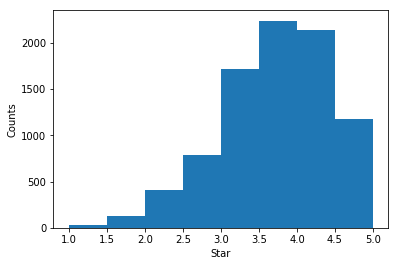

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(stars, bins=8)
plt.xlabel('Star')
plt.ylabel('Counts')
plt.show()